In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os, json
from os.path import dirname
from pandas import DataFrame, concat
from tqdm import tqdm
import seaborn as sns 


from parse_mrst import get_data as get_mrst
from parse_pgng import get_data as get_pgng
from parse_twostep import get_data as get_twostep 
from parse_twostep import plot_behvaior as plot_twostep


In [25]:
dir = '../data/data_jul_4/'
all_files = glob('{}*'.format(dir))


In [26]:
# for file in all_files:
#     # os.rename(file, file+".json")
#     os.rename(file, file[:-5])

In [27]:
pgng_files = glob('{}s*_pgng_*[0-9].json'.format(dir))
# pgng_files = [glob('../data/*')[0]]
tmp_twostep_files = glob('../data/s*_twostep_*[0-9].json')
mrst_files = glob('{}s*_mrst_*[0-9].json'.format(dir))
twostep_files = glob('{}s*_twostep_*[0-9].json'.format(dir))

In [28]:
ext_files = glob('../data/data_jun_20/s*_scream_acq_ext_*[0-9].json')
rec_files = glob('../data/data_jun_20/s*_scream_recovery_*[0-9].json')

### get data

In [29]:
mrst_data = get_mrst(mrst_files, 20)

  0%|          | 0/13 [00:00<?, ?it/s]/Users/gilikarni/Documents/code/CRCRNS-geha/analysis/parse_mrst.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['missing'] = data['missing'].astype(int)
  8%|▊         | 1/13 [00:00<00:04,  2.66it/s]/Users/gilikarni/Documents/code/CRCRNS-geha/analysis/parse_mrst.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['missing'] = data['missing'].astype(int)
 15%|█▌        | 2/13 [00:00<00:05,  2.03it/s]/Users/gilikarni/Documents/code/CRCRNS-geha/analysis/par

In [12]:
twostep_data = get_twostep(twostep_files, 20)

100%|██████████| 5/5 [00:00<00:00, 57.80it/s]


In [13]:
# twostep_data.to_csv('../data/data_jun_20/twostep_jun_20.csv')

In [14]:
pgng_data = get_pgng(pgng_files, 20)

### get initial behavioral marks 

##### MRST

In [30]:
mrst_comprehension = np.zeros((len(mrst_files),5))

for ind, f in enumerate(mrst_files):
        
        ## Define subject
        subject = f[20:23]
        ## Load JSON.
        with open(f, 'r') as tmp:
            JSON = json.load(tmp)
        
        mrst_comprehension[ind][0] = subject

        for i in JSON:
            if i["trial_type"] == "mrst-comprehension'":
                if i['quiz']=='1a':
                    mrst_comprehension[ind][1] += i['num_errors']
                if i['quiz']=='1b':
                    mrst_comprehension[ind][2] += i['num_errors']
                if i['quiz']=='1c':
                    mrst_comprehension[ind][3] += i['num_errors']
                if i['quiz']=='1d':
                    mrst_comprehension[ind][4] += i['num_errors']
                # print(subject, i['quiz'], i['num_errors'], i['rt'])
        

In [31]:
print(mrst_comprehension)

[[114.   1.   0.   0.   0.]
 [100.   0.   0.   1.   0.]
 [103.   0.   0.   0.   0.]
 [109.   0.   0.   0.   0.]
 [102.   1.   0.   1.   0.]
 [108.   0.   0.   1.   1.]
 [101.   0.   0.   1.   0.]
 [106.   0.   0.   1.   1.]
 [113.   0.   0.   0.   0.]
 [116.   0.   0.   0.   0.]
 [  9.   0.   0.   1.   1.]
 [115.   0.   0.   0.   0.]
 [105.   0.   0.   0.   0.]]


<AxesSubplot: xlabel='rt', ylabel='Count'>

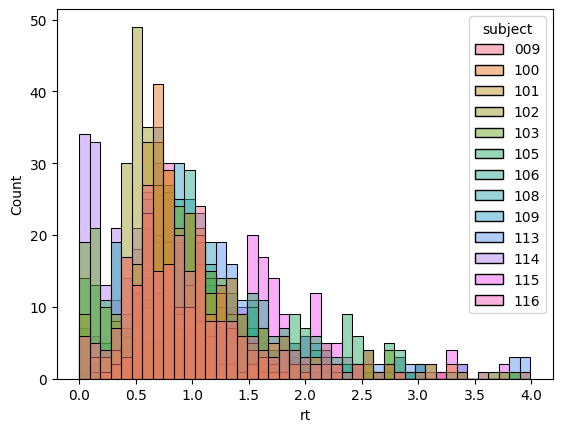

In [11]:
sns.histplot(mrst_data, x='rt', hue='subject')

# analyze rt as a func of first exposure 
# charactrize the first mode

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


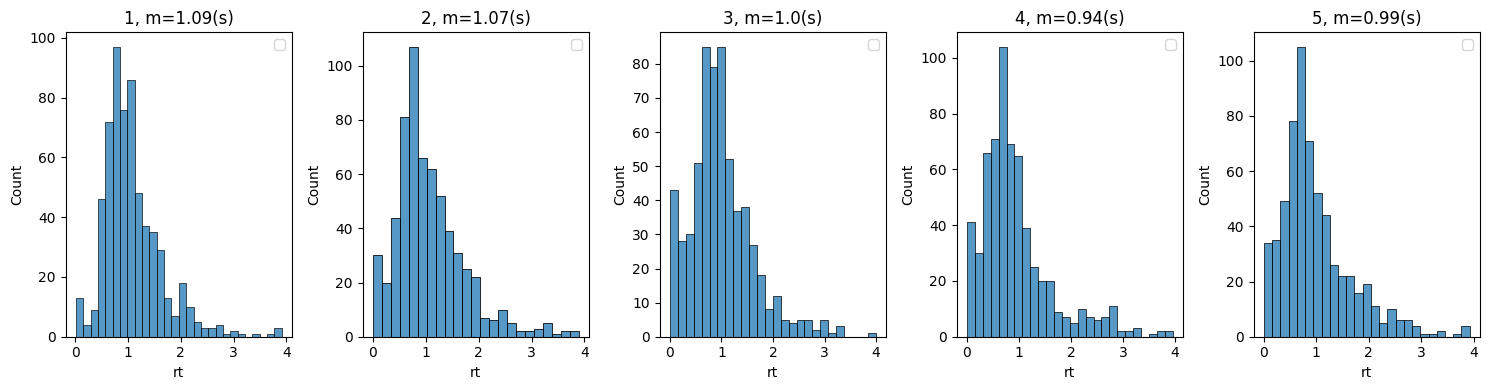

In [12]:


fig, ax = plt.subplots(1,5, figsize=(15,4))
for i, block in enumerate([1,2,3,4,5]):

    h = sns.histplot(data=mrst_data[mrst_data.block==block],
            x='rt', 
            ax=ax[i])
     
    h.set_title(r'{}, m={}(s)'.format(block, np.round(mrst_data[mrst_data.block==block]['rt'].mean(), 2)))
    

    leg = h.legend()

plt.tight_layout()




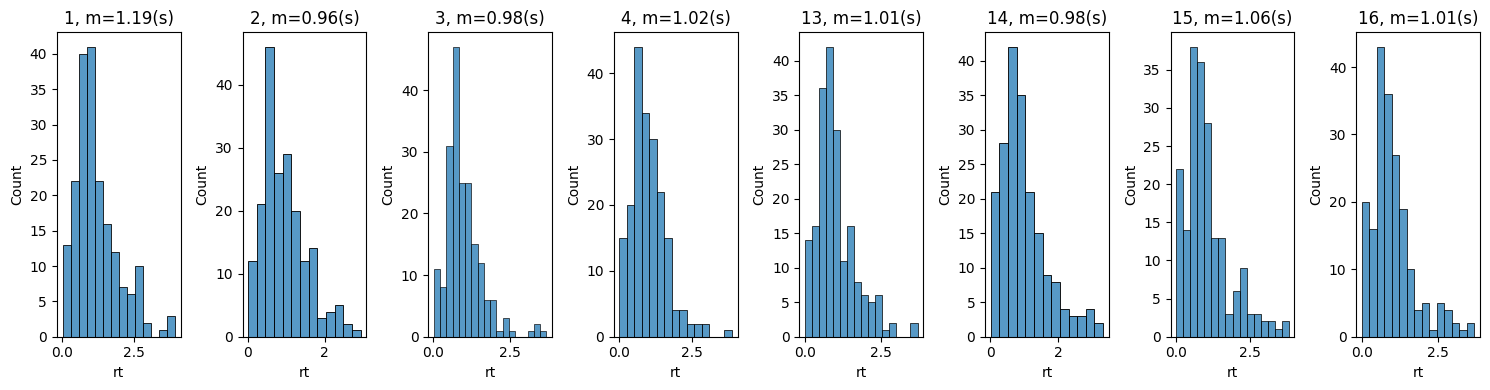

In [13]:


fig, ax = plt.subplots(1,8, figsize=(15,4))
for i, exp in enumerate([1,2,3,4,13,14,15,16]):

    h = sns.histplot(data=mrst_data[mrst_data.exposure==exp],
            x='rt', 
            ax=ax[i])
     
    h.set_title(r'{}, m={}(s)'.format(exp, np.round(mrst_data[mrst_data.exposure==exp]['rt'].mean(), 2)))
    

    # leg = h.legend()

plt.tight_layout()




In [134]:
mrst_data['stay'] = np.roll(mrst_data['key_press'],1)==mrst_data['key_press']

# not trials where subjects stay
# not early or late exposure
# not probability dependant 
#not color, points, or stimuli on card

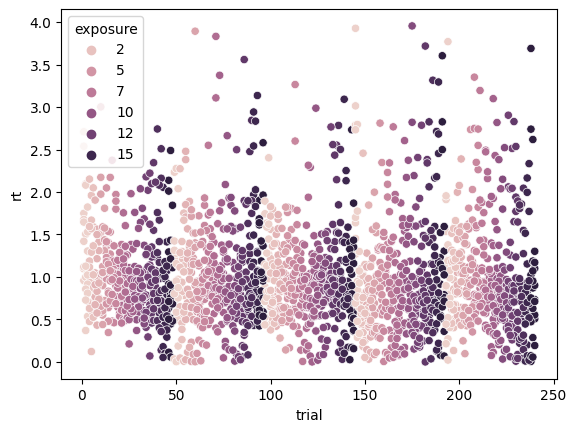

In [152]:
# sns.scatterplot(data=mrst_data, x='rt',y='exposure',
#                 hue='subject')

sns.scatterplot(data=mrst_data, x='trial',y='rt',
                hue='exposure')
plt.show()


# sns.histplot(data=mrst_data, x='rt', hue='block')
# sns.boxplot(data=mrst_data, x='block',y='rt')
# plt.show()

# sns.boxplot(data=mrst_data, x='exposure',y='rt')

# plt.show()
# block 4 after the break has a lot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

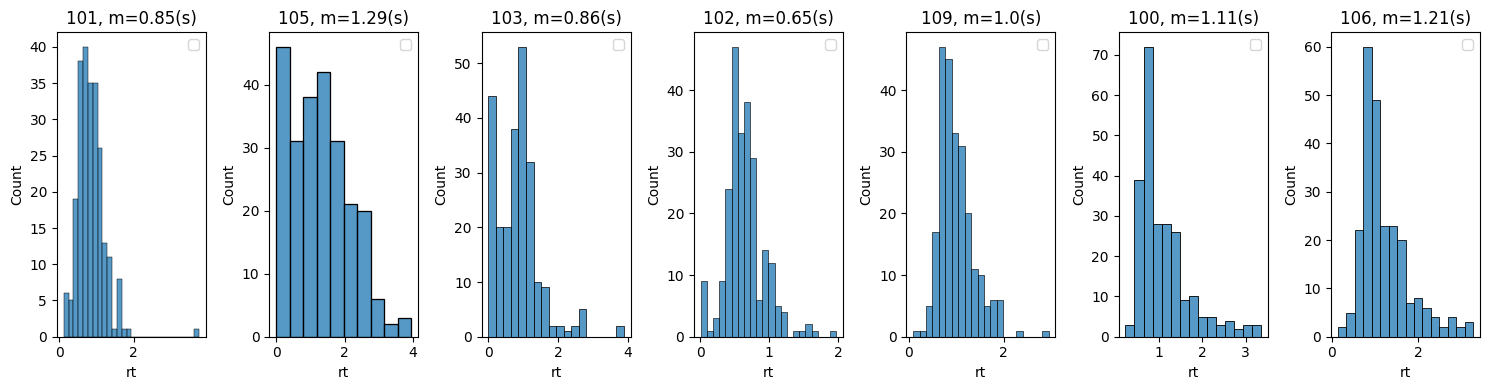

In [24]:


fig, ax = plt.subplots(1,7, figsize=(15,4))
for i, sub in enumerate(set(mrst_data.subject)):

    h = sns.histplot(data=mrst_data[mrst_data.subject==sub],
            x='rt', 
            ax=ax[i])
     
    h.set_title(r'{}, m={}(s)'.format(sub, np.round(mrst_data[mrst_data.subject==sub]['rt'].mean(), 2)))
    

    leg = h.legend()

plt.tight_layout()



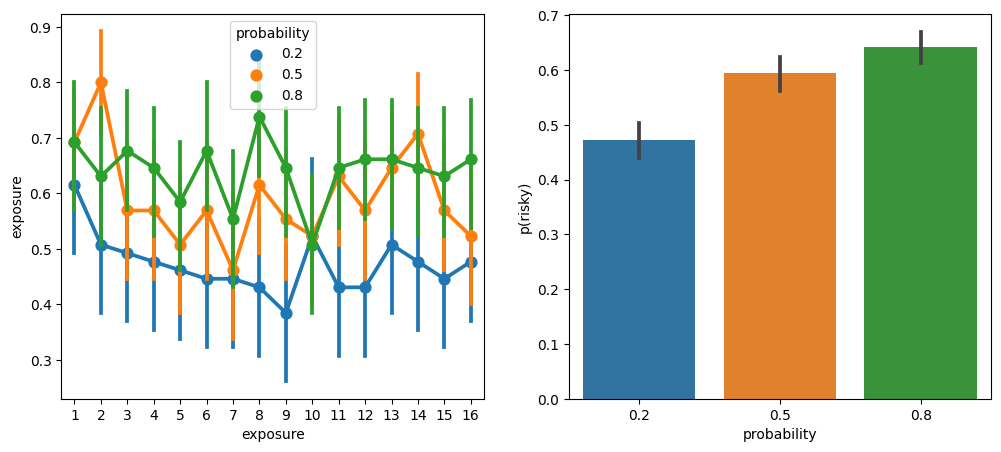

In [32]:
### MRST MAIN EFFECTS

## Plot learning curves.
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.pointplot(x='exposure', y='choice', 
              hue='probability', 
              data=mrst_data[mrst_data.missing==0], 
              hue_order=[0.2,0.5,0.8],
              ax=ax[0])
ax[0].set_ylabel('p(risky)')
ax[0].set_ylabel('exposure')


#plt over all risky choice

sns.barplot(x='probability', y='choice', 
            data=mrst_data[mrst_data.missing==0], 
            hue_order=[0.2,0.5,0.8],
            ax=ax[1])
ax[1].set_ylabel('p(risky)')
ax[1].set_xlabel('probability')
plt.show()


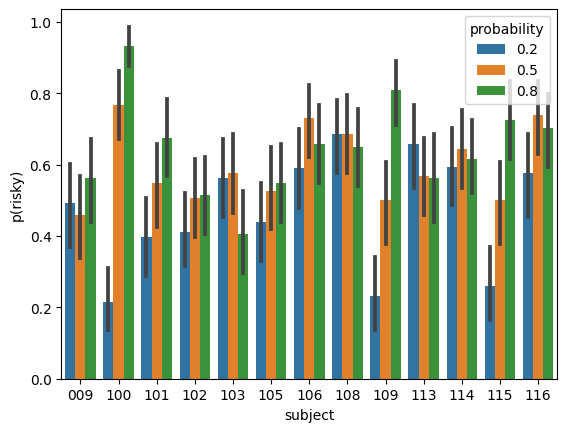

In [35]:
### MRST MAIN EFFECTS / per subject
sns.barplot(x='subject', y='choice', 
            data=mrst_data[mrst_data.trial>20], 
            hue='probability',
            hue_order=[0.2,0.5,0.8],legend=False,
            )
plt.xlabel('subject')
plt.ylabel('p(risky)')
plt.show()

##### PGNG

In [18]:
pgng_data.groupby('robot').sum()['sham']/pgng_data.groupby('robot').count()['sham']

/var/folders/f7/jcqxh9dj3tv469cncv9966q40000gn/T/ipykernel_10289/3709120659.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pgng_data.groupby('robot').sum()['sham']/pgng_data.groupby('robot').count()['sham']


robot
gal     0.211111
gw      0.200000
ngal    0.202778
ngw     0.230556
Name: sham, dtype: float64

/var/folders/f7/jcqxh9dj3tv469cncv9966q40000gn/T/ipykernel_10289/4186140597.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.hist(np.array(pgng_data.groupby('rune').sum()['sham']/pgng_data.groupby('rune').count()['sham']))


(array([6., 3., 5., 2., 6., 3., 0., 0., 0., 1.]),
 array([0.11904762, 0.15089286, 0.1827381 , 0.21458333, 0.24642857,
        0.27827381, 0.31011905, 0.34196429, 0.37380952, 0.40565476,
        0.4375    ]),
 <BarContainer object of 10 artists>)

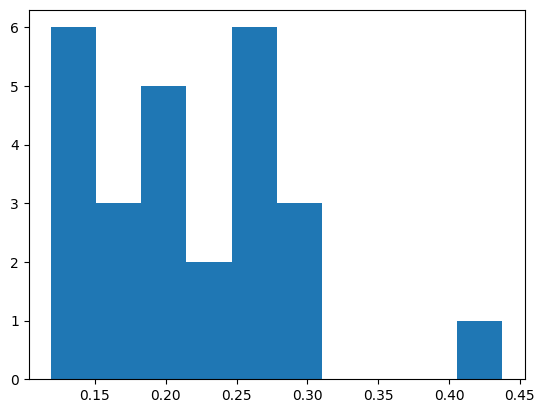

In [23]:
plt.hist(np.array(pgng_data.groupby('rune').sum()['sham']/pgng_data.groupby('rune').count()['sham']))

In [3]:

pgng_data.choice.replace({" ":1}, inplace=True)
## Initialize canvas.

## Define aesthetics.
palette = ['#234f81', '#8e9cb8', '#bf8a82', '#812623']
hue_order = ['gw','ngw','gal','ngal']

## Plot learning curves.
g = sns.lineplot(data=pgng_data, x='exposure', 
                 y='choice', hue='robot', 
                 hue_order=hue_order, 
                 palette=palette, 
      lw=3, errorbar=('ci', 95))



NameError: name 'pgng_data' is not defined

##### TWO STEP

In [4]:
clean_data = []
for subject in set(twostep_data.subject):
    for trial in set(twostep_data.trial):
        rows = twostep_data[(twostep_data.trial==trial) & (twostep_data.subject==subject)] 
        n_pd = len(rows)
        if n_pd > 1:
            clean_data.append(rows.query('missing==0'))
        else:
            clean_data.append(rows)

clean_data = concat(clean_data).sort_values(['subject','trial'])

NameError: name 'twostep_data' is not defined

In [5]:
clean_data.groupby(['subject']).sum()['missing']
clean_data.groupby(['subject']).nunique()['trial']

AttributeError: 'list' object has no attribute 'groupby'

<AxesSubplot: xlabel='trial', ylabel='subject'>

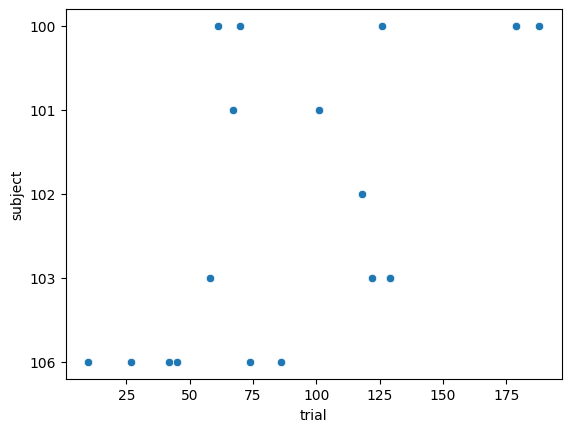

In [23]:
sns.scatterplot(data=twostep_data[twostep_data.missing==1], x='trial', y='subject')

100%|██████████| 1/1 [00:00<00:00, 33.91it/s]


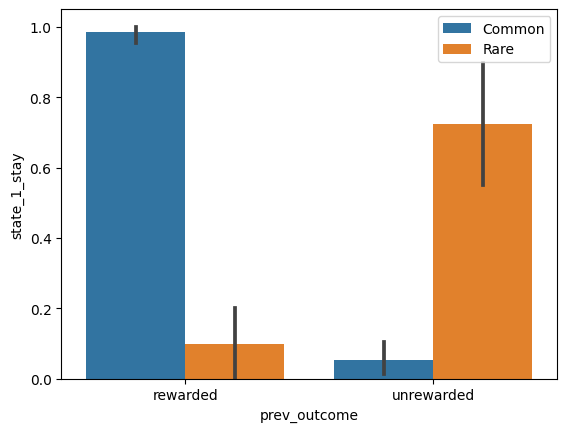

In [9]:
# agresively playing WSLS strategy to see if visibile - visible 

tmp_twostep_data = get_twostep(tmp_twostep_files)


g = sns.barplot(data=tmp_twostep_data,
            x='prev_outcome', y='state_1_stay',
            hue='prev_trans', order=[1,0], hue_order=[1,0], )

g.set_xticklabels(['rewarded','unrewarded'] )
#g.set(xlabel="Reward", ylabel = "Stay")

leg = g.legend()
new_labels =  ['Common', 'Rare'] 
for t, l in zip(leg.texts, new_labels): t.set_text(l)


In [10]:
twostep_data = twostep_data[twostep_data.trial>10]

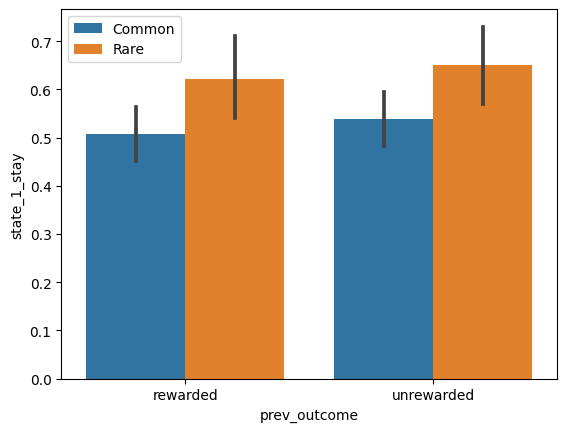

In [25]:
# p(stay) classic figure - looks odd. (A) why p(stay) is higher in rare transition? (B)no reward should be lower than reward
g = sns.barplot(data=twostep_data,
            x='prev_outcome', y='state_1_stay',
            hue='prev_trans', order=[1,0], hue_order=[1,0])

g.set_xticklabels(['rewarded','unrewarded'])
#g.set(xlabel="Reward", ylabel = "Stay")

leg = g.legend()
new_labels =   ['Common', 'Rare']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

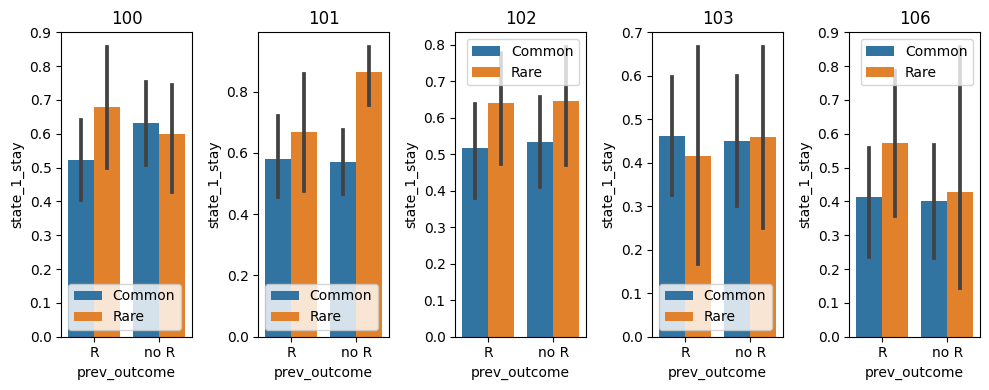

In [26]:
# p(stay) per subject - no one looks great...

fig, ax = plt.subplots(1,5, figsize=(10,4))
for i, sub in enumerate(sorted(set(twostep_data.subject))):

    h = sns.barplot(data=twostep_data[twostep_data.subject==sub],
            x='prev_outcome', y='state_1_stay',
            order=[1,0], hue_order=[1,0], ax=ax[i],
            hue='prev_trans')
     

    h.set_xticklabels(['R','no R'])
    h.set_title(sub)

    leg = h.legend()
    new_labels = ['Common', 'Rare']
    for t, l in zip(leg.texts, new_labels): t.set_text(l)
 
plt.tight_layout()


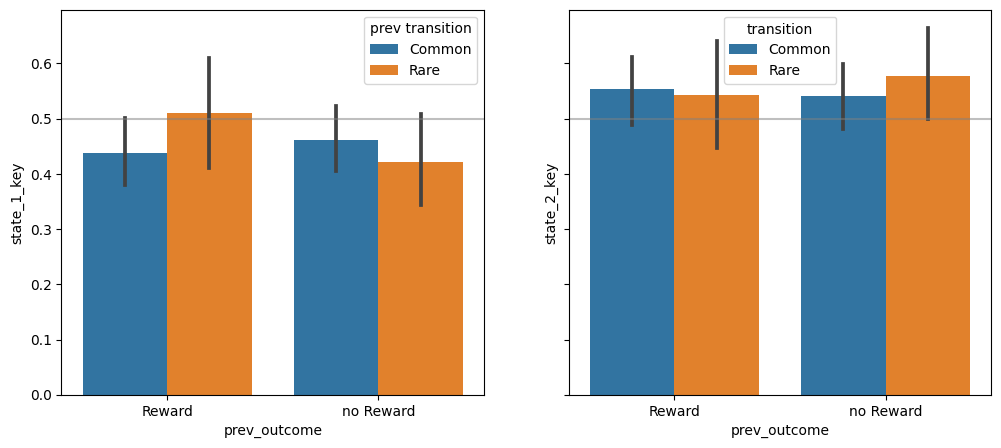

In [19]:
# always same key? looks about 50%

fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)

g = sns.barplot(data=twostep_data,
            x='prev_outcome', y='state_1_key',
            hue='prev_trans', hue_order=[1,0],
            order=[1,0], ax=ax[0])

g.set_xticklabels(['Reward', 'no Reward'])

leg = g.legend()
leg.set_title('prev transition')

new_labels =['Common', 'Rare']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

#g.set(xlabel="Reward", ylabel = "Stay")

g1 = sns.barplot(data=twostep_data,
            x='prev_outcome', y='state_2_key',
            hue='transition', hue_order=[1,0],
            order=[1,0], ax=ax[1])

g1.set_xticklabels(['Reward', 'no Reward'])

leg = g1.legend()
leg.set_title('transition')

new_labels =['Common', 'Rare']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

ax[0].axhline(y=.5, c='grey', alpha=.5)
ax[1].axhline(y=.5, c='grey', alpha=.5)




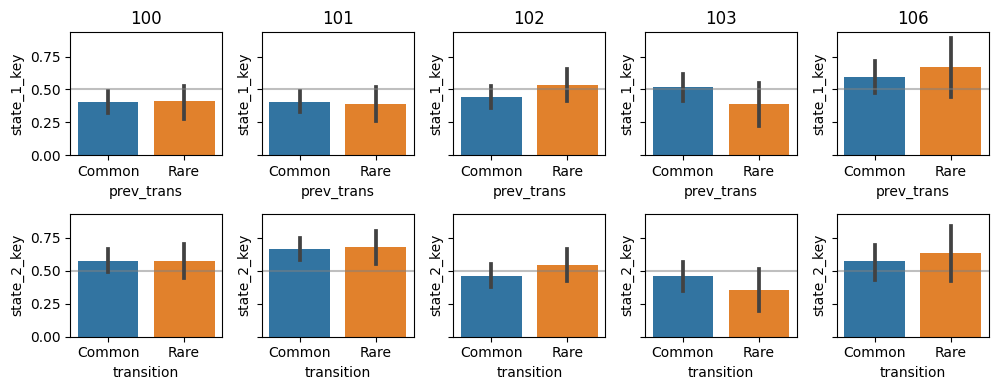

In [22]:
# and per subject- too random??
fig, ax = plt.subplots(2,5, figsize=(10,4), sharey=True)
for i, sub in enumerate(sorted(set(twostep_data.subject))):

    h = sns.barplot(data=twostep_data[twostep_data.subject==sub],
            x='prev_trans', y='state_1_key',
            order=[1,0], ax=ax[0][i])

    ax[0][i].axhline(y=.5, c='grey', alpha=.5)
    ax[1][i].axhline(y=.5, c='grey', alpha=.5)

    h.set_xticklabels(['Common', 'Rare'])

    h.set_title(sub)

    h1 = sns.barplot(data=twostep_data[twostep_data.subject==sub],
            x='transition', y='state_2_key',
            order=[1,0], ax=ax[1][i])
    h1.set_xticklabels(['Common', 'Rare'])


plt.tight_layout()




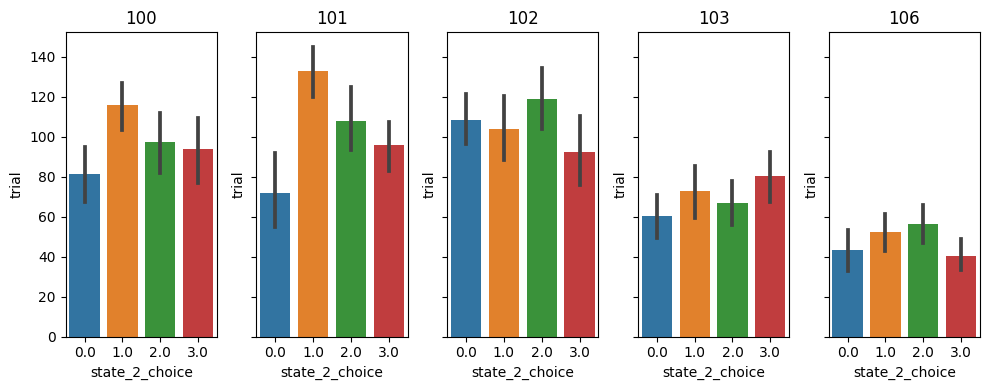

In [23]:
# and per subject- choice of bandit in s2. how are the number so different. how much eampty data we have?
fig, ax = plt.subplots(1,5, figsize=(10,4), sharey=True)
for i, sub in enumerate(sorted(set(twostep_data.subject))):

    h = sns.barplot(data=twostep_data[twostep_data.subject==sub],
            x='state_2_choice', y='trial',
             ax=ax[i])
     
    # h.set_xticklabels(['Common', 'Rare'])

    h.set_title(sub)


plt.tight_layout()




In [27]:
twostep_data.groupby('subject').nunique()['trial']
# some mising data (full data 191)

subject
100    188
101    201
102    201
103    129
106     86
Name: trial, dtype: int64

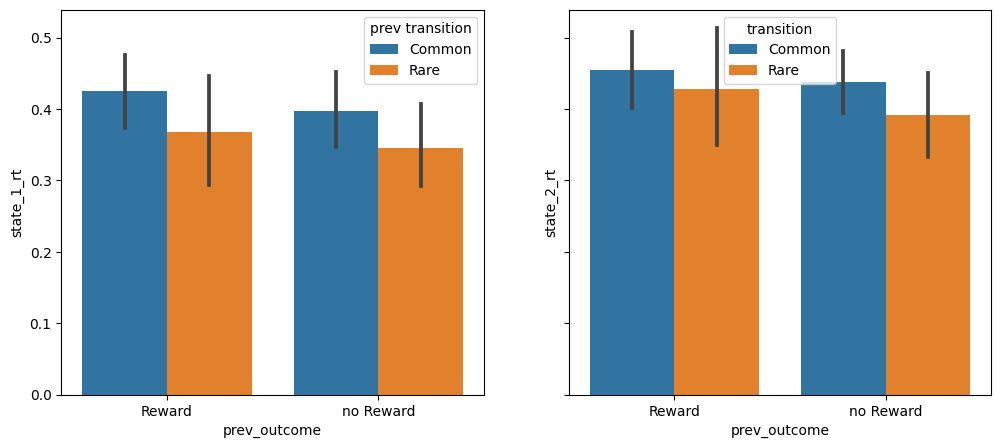

In [113]:
# how about RT -  s1 RT are low,  s2 RT are also low (lower for rare? weird!)
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)

g = sns.barplot(data=twostep_data,
            x='prev_outcome', y='state_1_rt',
            hue='prev_trans', hue_order=[1,0],
            order=[1,0], ax=ax[0])

g.set_xticklabels(['Reward', 'no Reward'])

leg = g.legend()
leg.set_title('prev transition')

new_labels =['Common', 'Rare']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

#g.set(xlabel="Reward", ylabel = "Stay")

g1 = sns.barplot(data=twostep_data,
            x='prev_outcome', y='state_2_rt',
            hue='transition', hue_order=[1,0],
            order=[1,0], ax=ax[1])

g1.set_xticklabels(['Reward', 'no Reward'])

leg = g1.legend()
leg.set_title('transition')

new_labels =['Common', 'Rare']
for t, l in zip(leg.texts, new_labels): t.set_text(l)



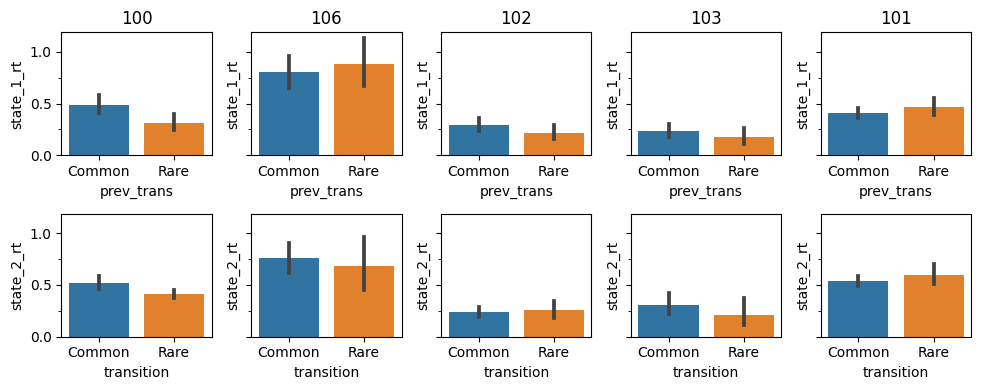

In [122]:
# RT per subject. some subjects go as low as 200 ms

fig, ax = plt.subplots(2,5, figsize=(10,4), sharey=True)
for i, sub in enumerate(set(twostep_data.subject)):
    
    ax[0][i].set_yticks(np.linspace(0,1,5), minor=True)
    ax[1][i].set_yticks(np.linspace(0,1,5), minor=True)


    h = sns.barplot(data=twostep_data[twostep_data.subject==sub],
            x='prev_trans', y='state_1_rt',
            order=[1,0], ax=ax[0][i])
     
    h.set_xticklabels(['Common', 'Rare'])

    h.set_title(sub)

    h1 = sns.barplot(data=twostep_data[twostep_data.subject==sub],
            x='transition', y='state_2_rt',
            order=[1,0], ax=ax[1][i])
    
    h1.set_xticklabels(['Common', 'Rare'])

plt.tight_layout()



In [ ]:
fig, ax = plt.subplots(2,5, figsize=(10,4), sharey=True)
for i, sub in enumerate(set(twostep_data.subject)):

    h = sns.barplot(data=twostep_data[twostep_data.subject==sub],
            x='prev_outcome', y='state_1_rt',
            order=[1,0], ax=ax[0][i])
     
    h.set_xticklabels(['Common', 'Rare'])

    h.set_title(sub)

    h1 = sns.barplot(data=twostep_data[twostep_data.subject==sub],
            x='prev_outcome', y='state_2_rt',
            order=[1,0], ax=ax[1][i])

plt.tight_layout()


In [ ]:
# twostep_data['quarter']

bins = np.linspace(10,86,5)
labels = [1,2,3,4]
twostep_data['binned'] = pd.cut(twostep_data['trial'], bins=bins, labels=labels)

/var/folders/f7/jcqxh9dj3tv469cncv9966q40000gn/T/ipykernel_17235/3761358685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twostep_data['binned'] = pd.cut(twostep_data['trial'], bins=bins, labels=labels)


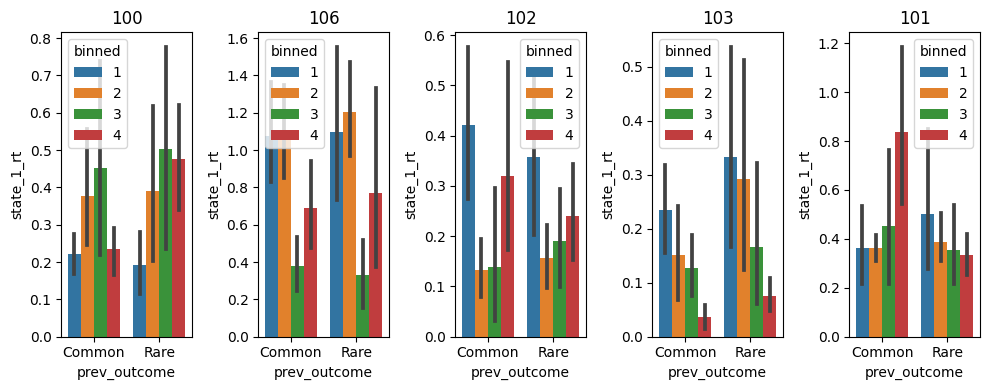

In [59]:
fig, ax = plt.subplots(1,5, figsize=(10,4))
for i, sub in enumerate(set(twostep_data.subject)):

    h = sns.barplot(data=twostep_data[twostep_data.subject==sub],
            x='prev_outcome', 
            y='state_1_rt',
            hue='binned',hue_order=[1,2,3,4],
            order=[1,0], ax=ax[i])
     
    h.set_xticklabels(['Common', 'Rare'])
    h.set_title(sub)


    # leg = h.legend()
    # new_labels = ['rewarded','unrewarded'] 
    # for t, l in zip(leg.texts, new_labels): t.set_text(l)
    # h.set_title(sub)
plt.tight_layout()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


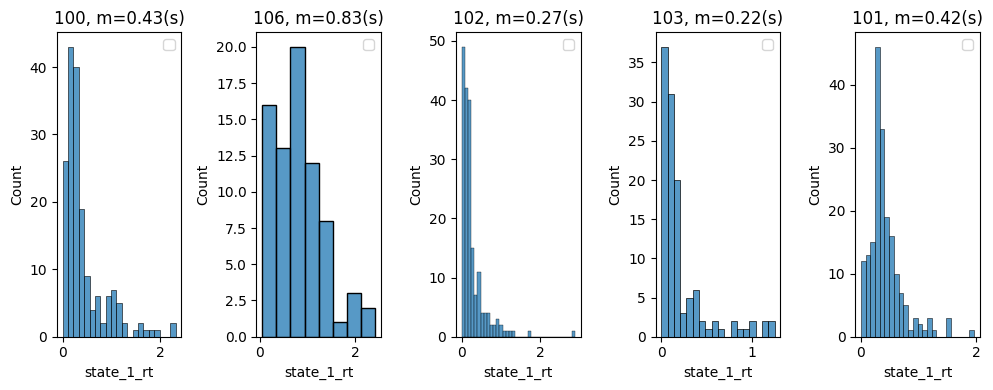

In [72]:
fig, ax = plt.subplots(1,5, figsize=(10,4))
for i, sub in enumerate(set(twostep_data.subject)):

    h = sns.histplot(data=twostep_data[twostep_data.subject==sub],
            x='state_1_rt', 
            ax=ax[i])
     
    h.set_title(r'{}, m={}(s)'.format(sub, np.round(twostep_data[twostep_data.subject==sub]['state_1_rt'].mean(), 2)))
    

    leg = h.legend()

plt.tight_layout()


In [86]:
comprehension = np.zeros((len(twostep_files),4))

for ind, f in enumerate(twostep_files):
        
        ## Define subject
        subject = f[21:24]
        
        ## Load JSON.
        with open(f, 'r') as tmp:
            JSON = json.load(tmp)
        
        comprehension[ind][0] = subject

        for i in JSON:
            if i["trial_type"] == "two-step-comprehension'":
                if i['quiz']=='1a':
                    comprehension[ind][1] += i['num_errors']
                if i['quiz']=='1b':
                    comprehension[ind][2] += i['num_errors']
                if i['quiz']=='1c':
                    comprehension[ind][3] += i['num_errors']
                print(subject, i['quiz'], i['num_errors'], i['rt'])
        

102 1a 0 8949.800000011921
102 1b 1 9901.300000011921
102 1b 0 2917.2999999523163
102 1c 0 9724.399999976158
101 1a 0 13445.400000095367
101 1b 0 12605.700000047684
101 1c 0 5365.700000047684
106 1a 1 10021.399999976158
106 1a 0 8309.899999976158
106 1b 0 20413.5
106 1c 0 11156.899999976158
103 1a 0 6381.800000011921
103 1b 1 9437.59999999404
103 1b 0 1933.6000000238419
103 1c 0 1997.5
100 1a 0 6013.5
100 1b 0 8572.600000023842
100 1c 0 6908.899999976158


In [85]:
comprehension

array([[102.,   0.,   1.,   0.],
       [101.,   0.,   0.,   0.],
       [106.,   1.,   0.,   0.],
       [103.,   0.,   1.,   0.],
       [100.,   0.,   0.,   0.]])